# STOR 320 Homework 5: Visualization and Linear Regression

Please submit the solution to gradescope by 11:59 PM, Nov 7, Thursday.

**Name**: Conor Jones

**PID**: 730665579


In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
import requests
from bs4 import BeautifulSoup
from sklearn.model_selection import train_test_split
import statsmodels.formula.api as smf
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

## Problem 1. (5 points). 

A random walk is a mathematical concept that describes a path consisting of a series of random steps. A random walk progresses in discrete steps. In each step, the position either increases or decreases by a certain amount, typically +1 or -1.

- 1.1 Generate 10 random walks, each starting at 0 and having 100 steps. Each step should be randomly either -1 or +1. Store each random walk as a separate line in a 2D array or list. Set random seed as `42`. (3 points)
- 1.2 Visualize the 10 random walks in a single plot. Each random walk should have its own color and be labeled as Walk 1, Walk 2, ..., Walk 10. (2 points)

In [35]:
np.random.seed(42)
steps = 100
num_walks = 10
walks = []

for _ in range(num_walks):
    steps_taken = np.random.choice([-1, 1], steps)
    walk = np.cumsum(np.insert(steps_taken, 0, 0))  # Insert 0 as the starting point
    walks.append(walk)

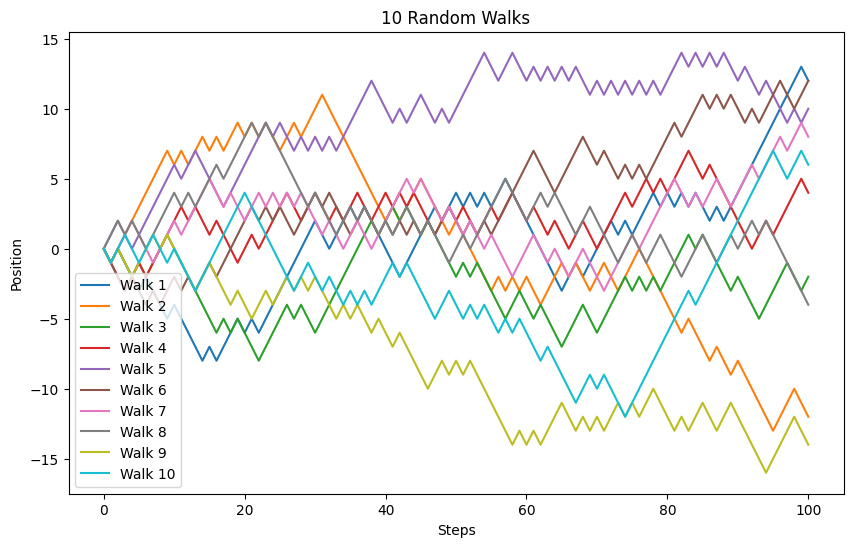

In [36]:
plt.figure(figsize=(10, 6))
for i, walk in enumerate(walks):
    plt.plot(walk, label=f'Walk {i + 1}')
plt.title("10 Random Walks")
plt.xlabel("Steps")
plt.ylabel("Position")
plt.legend()
plt.show()

## Problem 2. Recreate the  ``pd.get_dummies()`` function from stratch. (20 points). 

- 2.1 Write a function called `convert_to_binary` **from scratch** that takes a pandas DataFrame of categorical features and returns a DataFrame where each feature is converted into multiple binary columns.  (8 points)

* Each binary column should represent a feature-category combination.
* The column names should follow the format feature_category. For example, if the feature `Color` has values `E`, `I`, and `J`, the new columns should be `Color_E`, `Color_I`, and `Color_J`.

- 2.2 Apply the `convert_to_binary` to the `Color` and `Cut` columns in `diamonds-new.csv`. Print the converted dataframe. (4 points)

- 2.3 Apply the `pd.get_dummies()` function to the same dataset, and check if the output of `convert_to_binary` is the same as `pd.get_dummies()`. (8 points)

**Hint:** Use `np.allclose` to check if the outputs are the same.


In [37]:
def convert_to_binary(df):
    binary_df = pd.DataFrame()
    for column in df.columns:
        dummies = pd.get_dummies(df[column], prefix=column)
        binary_df = pd.concat([binary_df, dummies], axis=1)
    return binary_df

In [38]:
diamonds = pd.read_csv('diamonds-new.csv')

binary_df = convert_to_binary(diamonds[['Color', 'Cut']])
print(binary_df)

       Color_D  Color_E  Color_F  Color_G  Color_H  Color_I  Color_J  \
0        False     True    False    False    False    False    False   
1        False     True    False    False    False    False    False   
2        False     True    False    False    False    False    False   
3        False    False    False    False    False     True    False   
4        False    False    False    False    False    False     True   
...        ...      ...      ...      ...      ...      ...      ...   
53935     True    False    False    False    False    False    False   
53936     True    False    False    False    False    False    False   
53937     True    False    False    False    False    False    False   
53938    False    False    False    False     True    False    False   
53939     True    False    False    False    False    False    False   

       Cut_Fair  Cut_Good  Cut_Ideal  Cut_Premium  Cut_Very Good  
0         False     False       True        False          False  
1

In [39]:
pd_dummies_df = pd.get_dummies(diamonds[['Color', 'Cut']])
np.allclose(binary_df.values, pd_dummies_df.values)

True

# Problem 3: Simple linear regression with `penguins` dataset (15 points)

The dataset `penguins`contains measurements for different penguin species. The dataset includes the following relevant columns:

- bill_length_mm: Length of the penguin's bill in millimeters.

- bill_depth_mm: Depth of the penguin's bill in millimeters.

- species: Species of the penguin (e.g., Adelie, Gentoo, Chinstrap).

* **3.1** Create a scatter plot with a linear regression line for the entire dataset. X-axis is the `bill_length_mm` and y-axis is the `bill_depth_mm`. (3 points)

* **3.2** Based on your plot, describe the relationship between bill length and bill depth. What is the meaning of the slope of the line in the plot? (3 points)

* **3.3** Create a similar scatter plot with a linear regression line grouping by species. X-axis is the `bill_length_mm` and y-axis is the `bill_depth_mm`. (4 points)

* **3.4** Based on your plot, describe the relationship between bill length and bill depth. Describe the differences of plots between 3.1 and 3.3 (5 points)

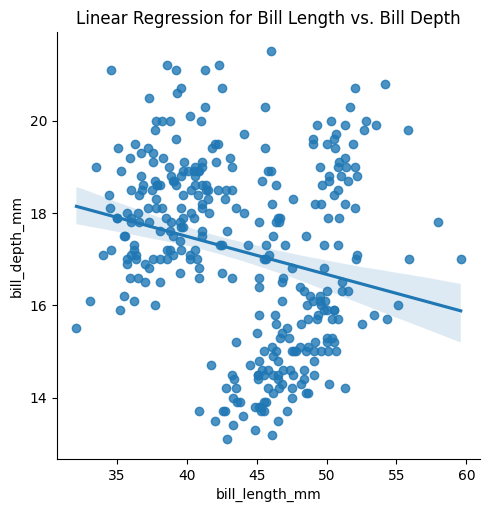

In [40]:
penguins = sns.load_dataset('penguins').dropna()
sns.lmplot(x='bill_length_mm', y='bill_depth_mm', data=penguins)
plt.title('Linear Regression for Bill Length vs. Bill Depth')
plt.show()

This scatterplot shows a downward linear trend. It shows that when the bill_length gets better the bill_depth gets smaller so this shows a negative linear trend.

c:\Users\conor\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\conor\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


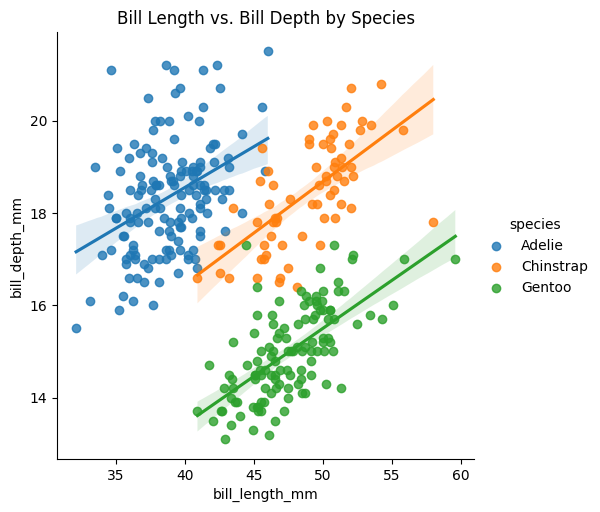

In [41]:
sns.lmplot(x='bill_length_mm', y='bill_depth_mm', hue='species', data=penguins)
plt.title('Bill Length vs. Bill Depth by Species')
plt.show()

This shows the oposite of the prevous plot. This shows that the bill_lenth gets bigger while the bill depth gets bigger. The trends flisps with it going down before no it gose up. I think this is called the simpsons paradox.

# Problem 4: Linear regression with `diamonds-new.csv`. (60 points)

* 4.1 Read the `diamonds-new.csv`, check if there is any missing value. How many missing values are there? (3 points)
* 4.2 Remove the rows with missing values. Check if there is any missing value in the new table. (2 points)
* 4.3 Create a histgram of the price distribution. What do you observe?  (5 points)
* 4.4 Create a scatter plot between `Price` and `Carat`, grouping by the level of `Cut`. What difference do you observe for different `Cut` levels? Do you observe a linear trend? (5 points)

* 4.5 Create a scatter plot between `Price` and `depth`, grouping by the level of `Cut`. Do you observe a linear trend? (5 points)

* 4.6 Create a barplot between `Price` and `Color`, grouping by the level of `Cut`. Which type of `Color` and `Cut` combination has the largest average price? (5 points)

* 4.7 Use `train_test_split` to split the whole dataset into training set and testing set, according to the ratio 80% and 20%. How many rows in the training set? How many rows in the test set? (5 points)

* 4.8 Build a linear regression model to predict the prices based on all other columns. What is the value of in-sample R-squared?  (5 points)

* 4.9 Calculate the VIF values for each column within `['Carat', 'depth', 'table', 'x', 'y', 'z']`. Is there any multicollinearity within these columns? (5 points)

* 4.10 Remove proper columns within `['Carat', 'depth', 'table', 'x', 'y', 'z']` based on the values of VIF. (5 points)

* 4.11 Build a new linear regression model using the selected columns in 4.10. What is the value of in-sample R-squared? Write down the math formulation for predicting the price of a diamonds based on the coefficient in this model. (5 points)

* 4.12 Calculate the out-of-sample R-squared for the model in 4.11. (5 points)

* 4.13 Visualize the prediction error as a function of the predicted prices. Add a horizontal line representing residual = 0. What do you observe? (5 points)



In [42]:
diamonds = pd.read_csv('diamonds-new.csv')
missing_values = diamonds.isnull().sum().sum()
missing_values

4

In [43]:
diamonds = diamonds.dropna()

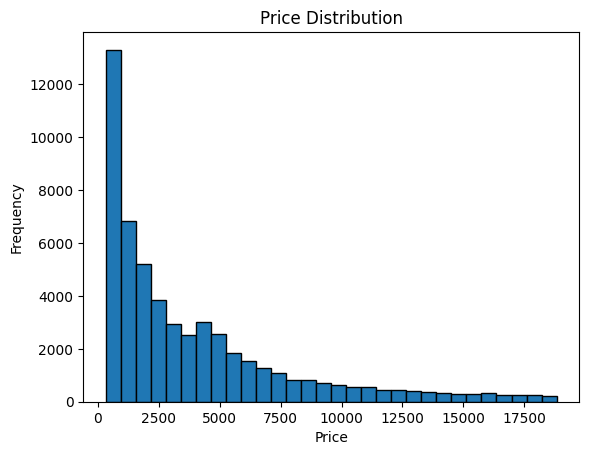

In [44]:
plt.hist(diamonds['Price'], bins=30, edgecolor='black')
plt.title('Price Distribution')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

c:\Users\conor\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\conor\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\conor\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\conor\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is depr

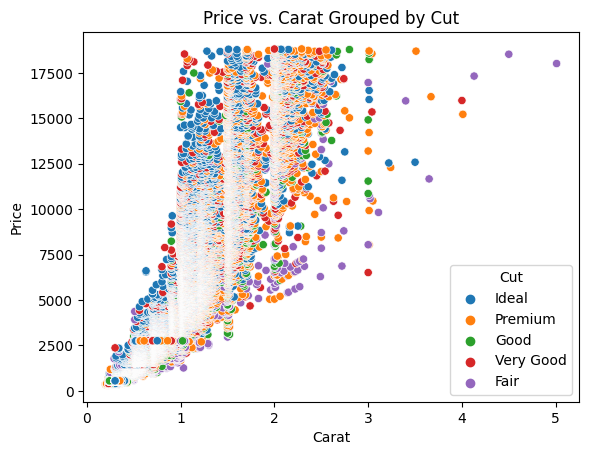

In [45]:
sns.scatterplot(x='Carat', y='Price', hue='Cut', data=diamonds)
plt.title('Price vs. Carat Grouped by Cut')
plt.xlabel('Carat')
plt.ylabel('Price')
plt.show()

c:\Users\conor\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\conor\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\conor\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\conor\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is depr

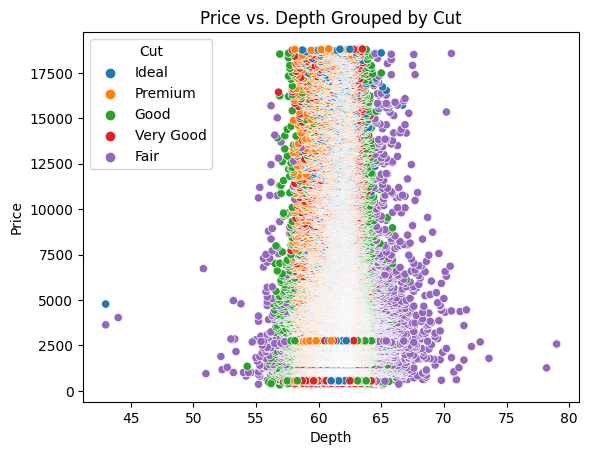

In [46]:
sns.scatterplot(x='depth', y='Price', hue='Cut', data=diamonds)
plt.title('Price vs. Depth Grouped by Cut')
plt.xlabel('Depth')
plt.ylabel('Price')
plt.show()

C:\Users\conor\AppData\Local\Temp\ipykernel_16644\3609495617.py:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Color', y='Price', hue='Cut', data=diamonds, ci=None)
c:\Users\conor\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\conor\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\conor\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isi

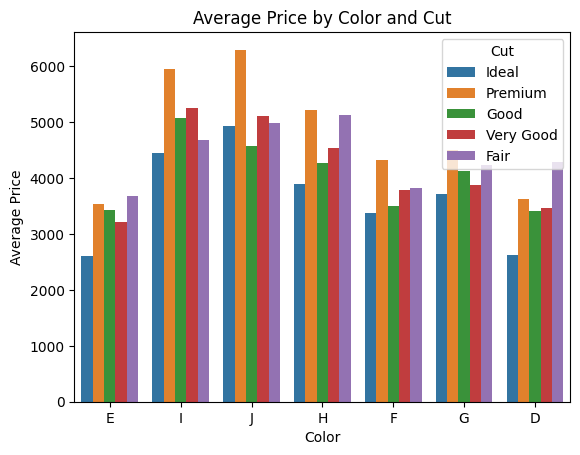

In [47]:
sns.barplot(x='Color', y='Price', hue='Cut', data=diamonds, ci=None)
plt.title('Average Price by Color and Cut')
plt.xlabel('Color')
plt.ylabel('Average Price')
plt.show()

In [48]:
train, test = train_test_split(diamonds, test_size=0.2, random_state=42)

In [49]:
# Fit the linear regression model
X_train = train.drop(columns=['Price'])
X_train = sm.add_constant(pd.get_dummies(X_train, drop_first=True))
X_train = X_train.apply(lambda x: x.astype(int) if x.dtype == bool else x)
y_train = train['Price']
model = sm.OLS(y_train, X_train).fit()

# Get the in-sample R-squared value
in_sample_r_squared = model.rsquared
print("In-sample R-squared:", in_sample_r_squared)

In-sample R-squared: 0.9190551541005593


In [50]:
features = ['Carat', 'depth', 'table', 'x', 'y', 'z']
X_vif = train[features]
X_vif = sm.add_constant(X_vif)

vif_data = pd.DataFrame()
vif_data['Feature'] = X_vif.columns
vif_data['VIF'] = [variance_inflation_factor(X_vif.values, i) for i in range(X_vif.shape[1])]
print(vif_data)

  Feature          VIF
0   const  4714.892073
1   Carat    21.747033
2   depth     1.446095
3   table     1.142142
4       x    54.651355
5       y    21.069126
6       z    20.215004


In [51]:
X_train_reduced = X_train.drop(columns=['x', 'y'])
vif_data_reduced = pd.DataFrame()
vif_data_reduced['Feature'] = X_train_reduced.columns
vif_data_reduced['VIF'] = [variance_inflation_factor(X_train_reduced.values, i) for i in range(X_train_reduced.shape[1])]
print(vif_data_reduced)


          Feature          VIF
0           const  5617.359483
1           Carat    11.157404
2           depth     1.422321
3           table     1.783040
4               z    11.021406
5        Cut_Good     3.955459
6       Cut_Ideal    11.415454
7     Cut_Premium     8.443612
8   Cut_Very Good     7.696953
9         Color_E     2.003287
10        Color_F     1.999280
11        Color_G     2.184359
12        Color_H     1.944401
13        Color_I     1.704549
14        Color_J     1.417548
15     Clarity_IF     3.561340
16    Clarity_SI1    14.897826
17    Clarity_SI2    11.507422
18    Clarity_VS1    10.889317
19    Clarity_VS2    14.376840
20   Clarity_VVS1     6.005136
21   Clarity_VVS2     7.700171


In [52]:
model_reduced = sm.OLS(y_train, X_train_reduced).fit()
print(f"New in-sample R-squared: {model_reduced.rsquared}")

print(model_reduced.params)


New in-sample R-squared: 0.9172164065092349
const            -4114.745815
Carat            10001.431314
depth                2.560121
table              -26.929804
z                 -779.960910
Cut_Good           604.583782
Cut_Ideal          841.841970
Cut_Premium        755.718301
Cut_Very Good      754.839586
Color_E           -225.787621
Color_F           -297.688935
Color_G           -502.515496
Color_H           -992.301497
Color_I          -1460.901028
Color_J          -2366.680033
Clarity_IF        5536.854611
Clarity_SI1       3732.193193
Clarity_SI2       2782.294273
Clarity_VS1       4673.875769
Clarity_VS2       4352.984298
Clarity_VVS1      5163.253120
Clarity_VVS2      5081.922074
dtype: float64


In [53]:
X_test = test.drop(columns=['Price'])
X_test = sm.add_constant(pd.get_dummies(X_test, drop_first=True))
X_test_reduced = X_test[X_train_reduced.columns]
y_test = test['Price']

y_pred = model_reduced.predict(X_test_reduced)
ss_res = ((y_test - y_pred) ** 2).sum()
ss_tot = ((y_test - y_test.mean()) ** 2).sum()
r_squared_out_of_sample = 1 - (ss_res / ss_tot)
r_squared_out_of_sample


0.9211507141581802

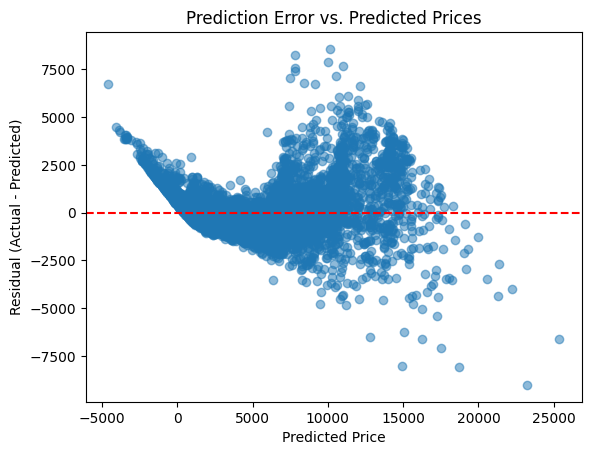

In [54]:
residuals = y_test - y_pred

plt.scatter(y_pred, residuals, alpha=0.5)
plt.axhline(y=0, color='r', linestyle='--')
plt.title('Prediction Error vs. Predicted Prices')
plt.xlabel('Predicted Price')
plt.ylabel('Residual (Actual - Predicted)')
plt.show()
